In [13]:
import time
import sys
import pathlib
import os
import numpy as np
import cv2 as cv
from spatialmath import SE3, SO3
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from spatialmath.base import trotx, troty, trotz
import roboticstoolbox as rtb
# Fix for notebooks: add the parent directory to sys.path
notebook_path = os.getcwd()
sys.path.append(str(pathlib.Path(notebook_path).parent))

# Now import your custom robot class
from classrobot.UR5e_DH import UR5eDH
import roboticstoolbox as rtb
from classrobot.robot_movement import RobotControl

import numpy as np
import roboticstoolbox as rtb
from spatialmath import SE3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # สำหรับการ plot 3D
import rtde_receive


In [28]:

# Robot DH parameters
robotDH1 = UR5eDH()

T_tool = SE3(0, 0, 0.200)  # 0.200 m = 200 mm
robotDH1.tool = T_tool
robot_ip = "192.168.200.10"
robot = RobotControl()
robot.robot_init(robot_ip)
pos_left_joint = robot.robot_get_joint_rad()
print("Robot Position:", pos_left_joint)

# Define the world (table) transformation:
T_world = SE3(0, 0.4, -0.115) * SE3.Rx(np.deg2rad(90)) * SE3.Ry(0) * SE3.Rz(0)
T_inv = T_world.inv()

# Set the robot's base transformation:
robotDH1.base = T_inv

q =  [0.7197909355163574, -1.9388791523375453, -2.0522477626800537, -2.2783595524229945, -0.8750937620746058, 2.3630921840667725]

T_fk = robotDH1.fkine(q)
T_TCP = T_fk 
T_TCP_world =  T_TCP
print("TCP Position in World Frame:", T_TCP_world)


Robot Position: [0.7197760343551636, -1.938883443871969, -2.052175521850586, -2.2783638439574183, -0.8750932852374476, 2.363101005554199]
TCP Position in World Frame:    0.009948  0.02428   0.9997    0.6981    
   0.6959   -0.7181    0.01051   0.283     
   0.7181    0.6956   -0.02404   0.2206    
   0         0         0         1         



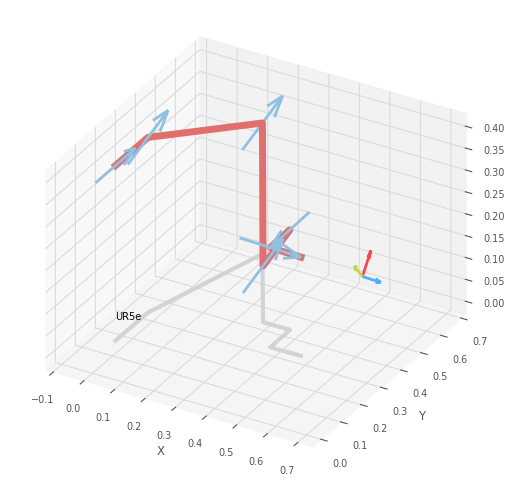

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.11499999999999998, 'UR5e')

<Figure size 640x480 with 0 Axes>

In [29]:
robotDH1.plot(q, block=False )